In [1]:
import numpy as np

In [2]:
import pandas as pd


In [3]:
import matplotlib.pyplot as plt

In [4]:
import sklearn.metrics as sm

In [5]:
%matplotlib inline

In [6]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [7]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [8]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [9]:
sum(diabetes_dataset.isnull().sum())

0

In [12]:
zero_counts = (diabetes_dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] == 0).sum()
print(zero_counts)

Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [17]:
diabetes_dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = diabetes_dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

In [18]:
print(diabetes_dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [16]:
diabetes_dataset.fillna(diabetes_dataset.mean(),inplace = True)

In [19]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.000000,24.000000,55.000000,29.7,0.370,33,0
1996,8,179.0,72.000000,42.000000,130.000000,32.7,0.719,36,1
1997,6,85.0,78.000000,29.341275,153.743295,31.2,0.382,42,0
1998,0,129.0,110.000000,46.000000,130.000000,67.1,0.319,26,1


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
LabelEncoder=LabelEncoder()

In [22]:
dataTransform = diabetes_dataset.copy()

In [24]:
for data in diabetes_dataset.columns:
    dataTransform[data]= LabelEncoder.fit_transform(diabetes_dataset[data])

In [25]:
dataTransform

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,76,15,28,92,120,18,26,1
1,0,21,28,24,77,166,102,2,0
2,0,83,22,22,92,212,343,10,1
3,0,73,19,35,134,199,203,3,1
4,1,77,15,34,172,188,298,0,0
...,...,...,...,...,...,...,...,...,...
1995,2,12,16,16,26,88,206,12,0
1996,8,117,21,35,82,113,380,15,1
1997,6,22,26,22,92,101,214,21,0
1998,0,67,44,39,82,245,170,5,1


In [26]:
X=dataTransform.drop(['Outcome'],axis=1)

In [27]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,76,15,28,92,120,18,26
1,0,21,28,24,77,166,102,2
2,0,83,22,22,92,212,343,10
3,0,73,19,35,134,199,203,3
4,1,77,15,34,172,188,298,0
...,...,...,...,...,...,...,...,...
1995,2,12,16,16,26,88,206,12
1996,8,117,21,35,82,113,380,15
1997,6,22,26,22,92,101,214,21
1998,0,67,44,39,82,245,170,5


In [28]:
Y=dataTransform['Outcome']

In [29]:
Y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

In [30]:
diabetes_feature_list=list(X.columns)

In [31]:
diabetes_feature_list

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=41)

In [34]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1519,9,57,21,14,27,10,389,27
1068,3,112,12,14,118,115,325,15
631,0,39,26,33,58,129,107,3
508,2,21,7,15,45,95,454,0
1006,4,126,44,24,92,78,363,16
...,...,...,...,...,...,...,...,...
321,3,49,23,23,92,103,76,4
1104,0,117,7,29,96,162,259,1
1932,8,93,15,18,174,124,301,25
931,1,8,15,22,92,15,235,5


In [35]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
751,1,58,26,32,43,174,128,7
1545,1,77,15,34,172,188,298,0
881,1,49,21,23,105,128,295,4
396,3,33,11,27,72,42,447,18
509,8,57,26,22,92,45,231,43
...,...,...,...,...,...,...,...,...
1518,9,72,23,26,31,53,261,51
1398,1,28,16,16,92,84,73,0
1091,10,29,15,22,92,53,54,10
1390,1,16,27,17,10,49,320,1


In [36]:
Y_test

751     0
1545    0
881     0
396     0
509     0
       ..
1518    0
1398    0
1091    0
1390    0
783     0
Name: Outcome, Length: 400, dtype: int64

In [37]:
Y_train

1519    0
1068    1
631     0
508     0
1006    0
       ..
321     1
1104    1
1932    1
931     0
1984    0
Name: Outcome, Length: 1600, dtype: int64

In [39]:
X_train.shape

(1600, 8)

In [40]:
Y_train.shape

(1600,)

In [41]:
X_test.shape

(400, 8)

In [42]:
Y_test.shape

(400,)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
randomforestclassifier =RandomForestClassifier(n_estimators=1200)

In [46]:
randomforestclassifier.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1200)

In [47]:
prediction_y= randomforestclassifier.predict(X_test)

In [48]:
prediction_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [49]:
experiment_accuracy =sm.accuracy_score(Y_test,prediction_y)
print('Accuracy Score: ', str(experiment_accuracy))

Accuracy Score:  0.995


In [50]:
from sklearn import metrics

In [51]:
print("Classification report :",metrics.classification_report(prediction_y,Y_test,target_names=["Diabetes","No Diabetes"]))

Classification report :               precision    recall  f1-score   support

    Diabetes       1.00      0.99      1.00       268
 No Diabetes       0.99      1.00      0.99       132

    accuracy                           0.99       400
   macro avg       0.99      1.00      0.99       400
weighted avg       1.00      0.99      1.00       400



In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
import seaborn as sb

In [54]:
sb.set()

In [55]:
get_ipython().run_line_magic('matplotlib','inline')

In [56]:
import matplotlib.pyplot as pt

In [57]:
confusionmt = confusion_matrix(Y_test,prediction_y)

Text(110.44999999999997, 0.5, 'predicted class axis')

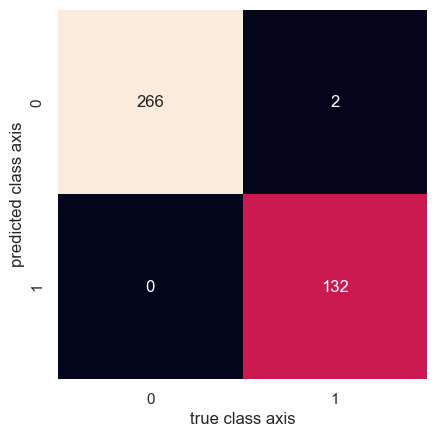

In [59]:
sb.heatmap(confusionmt.T,square=True,annot=True,fmt='d',cbar=False)
pt.xlabel('true class axis')
pt.ylabel('predicted class axis')